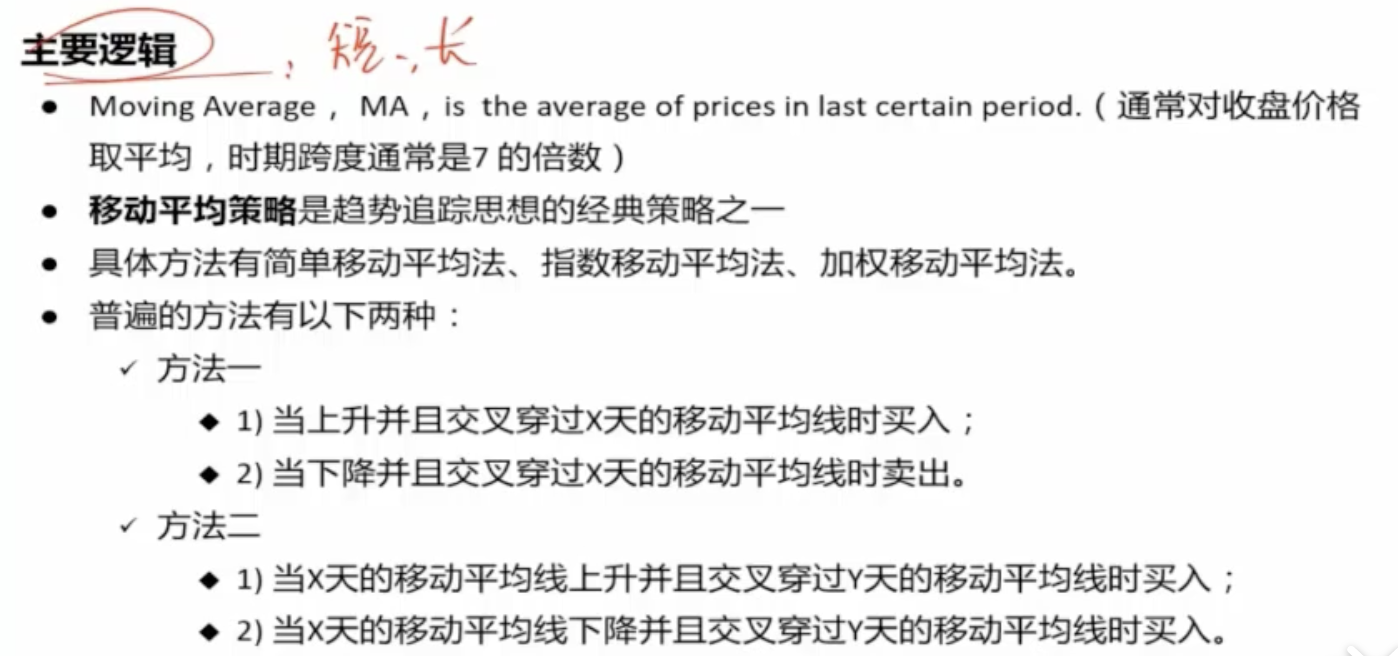

基本策略：短期均线上穿长期MA：golden cross——long；短期MA下穿长期MA：death cross-short

优化：在某一长期均线呈现上涨趋势时再买；smooth

## SMA策略

### 1.数据准备&回测准备

In [1]:
import numpy as np
import pandas as pd
import tushare as ts

In [2]:
data = ts.get_k_data('hs300',start='2010-01-01',end='2017-06-30')

In [3]:
data = pd.DataFrame(data) #将data转化成dataframe格式
data.head()

,date,open,close,high,low,volume,code
0,2010-01-04,3592.468,3535.229,3597.75,3535.23,66101080.0,hs300
1,2010-01-05,3545.186,3564.038,3577.53,3497.66,85809641.0,hs300
2,2010-01-06,3558.700,3541.727,3588.83,3541.17,78473125.0,hs300
3,2010-01-07,3543.160,3471.456,3558.56,3452.77,80350037.0,hs300
4,2010-01-08,3456.908,3480.130,3482.08,3426.70,60790253.0,hs300


In [4]:
data.rename(columns={'close':'price'},inplace=True) #将close重命名为price，方便理解
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1819 entries, 0 to 1818
Data columns (total 7 columns):
date      1819 non-null object
open      1819 non-null float64
price     1819 non-null float64
high      1819 non-null float64
low       1819 non-null float64
volume    1819 non-null float64
code      1819 non-null object
dtypes: float64(5), object(2)
memory usage: 113.7+ KB


In [5]:
data.set_index('date',inplace=True) #将日期设置为索引，覆盖
data.head()

,open,price,high,low,volume,code
date,,,,,,
2010-01-04,3592.468,3535.229,3597.75,3535.23,66101080.0,hs300
2010-01-05,3545.186,3564.038,3577.53,3497.66,85809641.0,hs300
2010-01-06,3558.700,3541.727,3588.83,3541.17,78473125.0,hs300
2010-01-07,3543.160,3471.456,3558.56,3452.77,80350037.0,hs300
2010-01-08,3456.908,3480.130,3482.08,3426.70,60790253.0,hs300


In [6]:
data['SMA_10'] = data['price'].rolling(10).mean() #10天移动平均
data['SMA_60'] = data['price'].rolling(60).mean() #60天移动平均
data.tail()

,open,price,high,low,volume,code,SMA_10,SMA_60
date,,,,,,,,
2017-06-26,3627.02,3668.09,3671.94,3627.02,134637995.0,hs300,3573.455,3475.314500
2017-06-27,3665.58,3674.72,3676.53,3648.76,97558702.0,hs300,3582.700,3478.729667
2017-06-28,3664.16,3646.17,3672.19,3644.03,97920858.0,hs300,3593.787,3481.746000
2017-06-29,3649.25,3668.83,3669.13,3644.73,85589498.0,hs300,3607.791,3485.613833
2017-06-30,3654.73,3666.80,3669.76,3646.23,81510028.0,hs300,3622.595,3489.126333


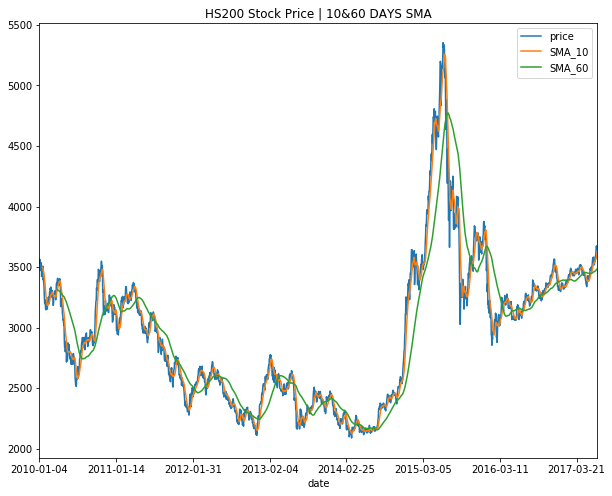

In [8]:
data[['price','SMA_10','SMA_60']].plot(title='HS200 Stock Price | 10&60 DAYS SMA',figsize=(10,8))

### 2 策略开发思路

In [9]:
data['position'] = np.where(data['SMA_10']>data['SMA_60'],1,-1) #上穿买入1，下穿卖空-1

In [10]:
data.dropna(inplace=True) #去掉空值

In [15]:
data.tail()

,open,price,high,low,volume,code,SMA_10,SMA_60,position
date,,,,,,,,,
2017-06-26,3627.02,3668.09,3671.94,3627.02,134637995.0,hs300,3573.455,3475.314500,1
2017-06-27,3665.58,3674.72,3676.53,3648.76,97558702.0,hs300,3582.700,3478.729667,1
2017-06-28,3664.16,3646.17,3672.19,3644.03,97920858.0,hs300,3593.787,3481.746000,1
2017-06-29,3649.25,3668.83,3669.13,3644.73,85589498.0,hs300,3607.791,3485.613833,1
2017-06-30,3654.73,3666.80,3669.76,3646.23,81510028.0,hs300,3622.595,3489.126333,1


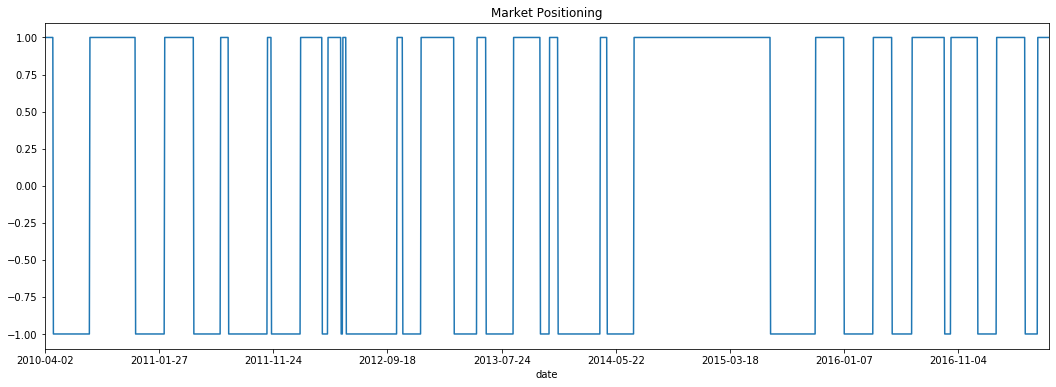

In [21]:
data['position'].plot(ylim=[-1.1 , 1.1],title='Market Positioning',figsize=(18,6))

### 3.计算年化收益率

先计算股票在这一时期的收益，再计算策略收益，long乘以+1，shor乘以t-1

In [22]:
data['return'] = np.log(data['price']/data['price'].shift(1))
data.head()

,open,price,high,low,volume,code,SMA_10,SMA_60,position,return
date,,,,,,,,,,
2010-04-02,3400.139,3407.346,3412.20,3391.81,69073452.0,hs300,3322.9136,3313.538117,1,NaN
2010-04-06,3422.849,3405.145,3436.29,3386.89,65191710.0,hs300,3333.1653,3311.370050,1,-0.000646
2010-04-07,3403.088,3386.949,3404.58,3369.02,54011228.0,hs300,3344.3029,3308.418567,1,-0.005358
2010-04-08,3381.306,3346.744,3381.31,3336.16,62185322.0,hs300,3351.3104,3305.168850,1,-0.011942
2010-04-09,3348.773,3379.170,3379.40,3342.47,51280567.0,hs300,3366.3146,3303.630750,1,0.009642


In [ ]:
# 计算离散return方法
data['return_disceret1'] = data['price']/data['price'].shift(1)-1
data['return_disceret2'] = data['price'].pct_change()

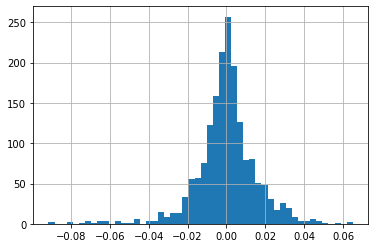

In [26]:
data['return'].hist(bins=50) #根据bin的值平均划分为n等份
#金融资产大多是负偏的

In [27]:
# 计算策略收益 
# 注意未来函数（高估收益）：今日的position只有收盘后才能知道，所以应该用昨天的position*今日的收益
data['strategy'] = data['position'].shift(1)*data['return']
data[['return','strategy']].sum()

return      0.073386
strategy    0.727122
dtype: float64

Q：避免未来函数——将策略改成在测试时直接计算前n天（不包括当天的价格）的平均 是否可行？

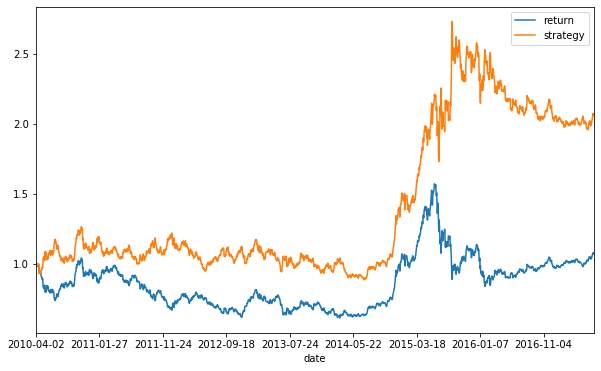

In [29]:
# 连续求和时，log相加之后取指数
data[['return','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

### 4.策略收益风险评估

In [30]:
# 计算年化收益率，每日收益（对数时直接去平均）*一年252
data[['return','strategy']].mean()*252
# strategy为10.4%

return      0.010513
strategy    0.104170
dtype: float64

In [31]:
# data.std()为每日标准差，年标准差*根号下252
data[['return','strategy']].std() * 252**0.5
#std相近，strategy的收益高，sharp ratio也比较高

return      0.245468
strategy    0.245382
dtype: float64

#### 计算最大回撤
max drawndown:最高点与最低点之差

In [39]:
data['cumret'] = data['strategy'].cumsum().apply(np.exp)
data['cummax'] = data['cumret'].cummax() #累计最大——记录迄今为止的最大值
data.head(5)

,open,price,high,low,volume,code,SMA_10,SMA_60,position,return,strategy,cumret,cummax
date,,,,,,,,,,,,,
2010-04-02,3400.139,3407.346,3412.20,3391.81,69073452.0,hs300,3322.9136,3313.538117,1,NaN,NaN,NaN,NaN
2010-04-06,3422.849,3405.145,3436.29,3386.89,65191710.0,hs300,3333.1653,3311.370050,1,-0.000646,-0.000646,0.999354,0.999354
2010-04-07,3403.088,3386.949,3404.58,3369.02,54011228.0,hs300,3344.3029,3308.418567,1,-0.005358,-0.005358,0.994014,0.999354
2010-04-08,3381.306,3346.744,3381.31,3336.16,62185322.0,hs300,3351.3104,3305.168850,1,-0.011942,-0.011942,0.982214,0.999354
2010-04-09,3348.773,3379.170,3379.40,3342.47,51280567.0,hs300,3366.3146,3303.630750,1,0.009642,0.009642,0.991731,0.999354


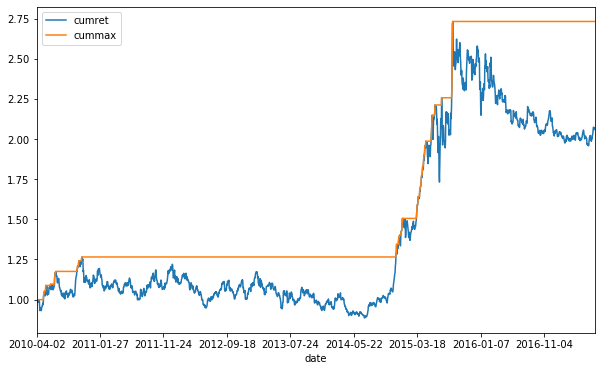

In [40]:
data[['cumret','cummax']].plot(figsize=(10,6))

In [42]:
drawdown = data['cummax']-data['cumret']
drawdown.max()
# 计算原理：最大回撤

0.7744165301748813

#### 计算最大回撤的持续时间

In [48]:
temp = drawdown[drawdown==0] #将累计收益与累计最大值标记为temp
periods = temp.index[1:].to_datetime()-temp.index[:-1].to_datetime()
periods.max()

AttributeError: 'Index' object has no attribute 'to_datetime'

### 5 策略优化的思路

震荡行情时收益不乐观，设置一定的阈值

In [52]:
hs300 = ts.get_k_data('hs300','2010-01-01','2017-06-30')[['date','close']]
hs300 = pd.DataFrame(hs300)
hs300.rename(columns={'close':'price'},inplace=True)
hs300.set_index('date',inplace=True)
hs300.head()

,price
date,
2010-01-04,3535.229
2010-01-05,3564.038
2010-01-06,3541.727
2010-01-07,3471.456
2010-01-08,3480.130


In [53]:
hs300['SMA_42'] = hs300['price'].rolling(42).mean()
hs300['SMA_252'] = hs300['price'].rolling(252).mean()
hs300[['price','SMA_42','SMA_252']].tail()

,price,SMA_42,SMA_252
date,,,
2017-06-26,3668.09,3473.202857,3368.922222
2017-06-27,3674.72,3478.768333,3371.298175
2017-06-28,3646.17,3483.553810,3373.400556
2017-06-29,3668.83,3488.842143,3375.678968
2017-06-30,3666.80,3494.248095,3377.887063


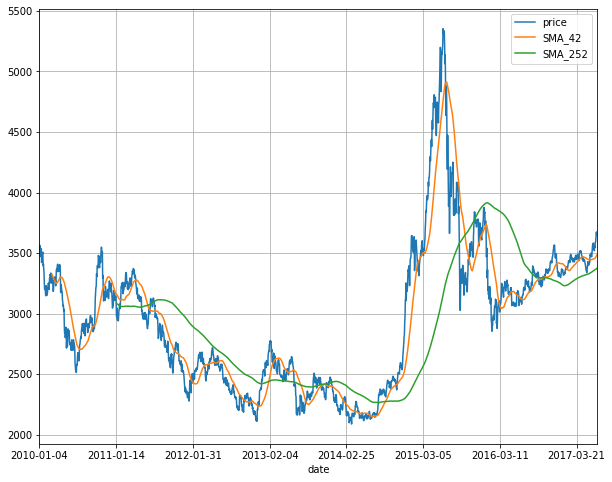

In [54]:
hs300[['price','SMA_42','SMA_252']].plot(grid=True, figsize=(10,8))

In [56]:
hs300['42-252'] = hs300['SMA_42']-hs300['SMA_252']
hs300['42-252'].tail()

date
2017-06-26    104.280635
2017-06-27    107.470159
2017-06-28    110.153254
2017-06-29    113.163175
2017-06-30    116.361032
Name: 42-252, dtype: float64

In [58]:
SD = 50 #设定阈值
hs300['regime'] = np.where(hs300['42-252']>SD,1,0)
hs300['regime'] = np.where(hs300['42-252']<-SD,-1,hs300['regime'] )
#hs300['regime'] = np.where(hs300['42-252']>SD,1,np.where(hs300['42-252']<-SD,-1,0)
hs300.tail()

,price,SMA_42,SMA_252,42-252,regime
date,,,,,
2017-06-26,3668.09,3473.202857,3368.922222,104.280635,1
2017-06-27,3674.72,3478.768333,3371.298175,107.470159,1
2017-06-28,3646.17,3483.553810,3373.400556,110.153254,1
2017-06-29,3668.83,3488.842143,3375.678968,113.163175,1
2017-06-30,3666.80,3494.248095,3377.887063,116.361032,1


In [59]:
hs300['Market'] = np.log(hs300['price']/hs300['price'].shift(1))
hs300['Strategy'] = hs300['regime'].shift(1) * hs300['Market']
hs300.tail()

,price,SMA_42,SMA_252,42-252,regime,Market,Strategy
date,,,,,,,
2017-06-26,3668.09,3473.202857,3368.922222,104.280635,1,0.012402,0.012402
2017-06-27,3674.72,3478.768333,3371.298175,107.470159,1,0.001806,0.001806
2017-06-28,3646.17,3483.553810,3373.400556,110.153254,1,-0.007800,-0.007800
2017-06-29,3668.83,3488.842143,3375.678968,113.163175,1,0.006196,0.006196
2017-06-30,3666.80,3494.248095,3377.887063,116.361032,1,-0.000553,-0.000553


In [62]:
hs300['Market_cum'] = hs300[['Market']].cumsum().apply(np.exp)
hs300['Strategy_cum'] = hs300[['Strategy']].cumsum().apply(np.exp)
hs300.tail()

,price,SMA_42,SMA_252,42-252,regime,Market,Strategy,Market_cum,Strategy_cum
date,,,,,,,,,
2017-06-26,3668.09,3473.202857,3368.922222,104.280635,1,0.012402,0.012402,1.037582,1.180698
2017-06-27,3674.72,3478.768333,3371.298175,107.470159,1,0.001806,0.001806,1.039457,1.182832
2017-06-28,3646.17,3483.553810,3373.400556,110.153254,1,-0.007800,-0.007800,1.031382,1.173642
2017-06-29,3668.83,3488.842143,3375.678968,113.163175,1,0.006196,0.006196,1.037791,1.180936
2017-06-30,3666.80,3494.248095,3377.887063,116.361032,1,-0.000553,-0.000553,1.037217,1.180283


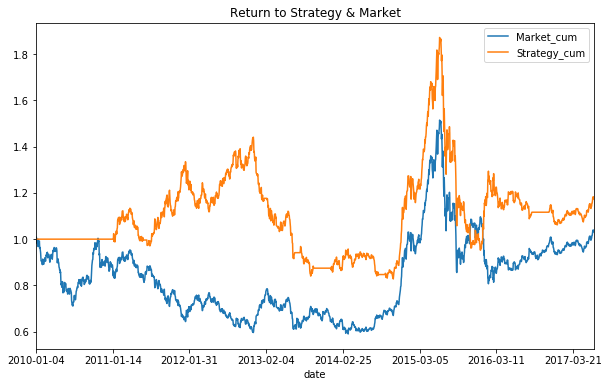

In [65]:
hs300[['Market_cum','Strategy_cum']].plot(figsize=(10,6),title='Return to Strategy & Market')

In [67]:
hs300[['Market','Strategy']].mean()*252

Market      0.005065
Strategy    0.022976
dtype: float64